In [106]:
from pystac.client import Client

# Open Overture STAC
overture = Client.open("https://labs.overturemaps.org/stac/catalog.json")
# overture = Client.open("http://localhost:8000/public_releases/catalog.json")

/Users/jenningsa/jupyter-env/lib/python3.13/site-packages/pystac_client/client.py:186: NoConformsTo: Server does not advertise any conformance classes.
  warnings.warn(NoConformsTo())


In [107]:
# List the current releases
for release in overture.get_children():
    print(release.id, release.title)

2025-05-21.0 Latest Overture Release
2025-04-23.0 2025-04-23.0 Overture Release
2025-03-19.1 2025-03-19.1 Overture Release
2025-03-19.0 2025-03-19.0 Overture Release
2025-02-19.0 2025-02-19.0 Overture Release


In [108]:
latest_release = [r.id for r in overture.get_children() if r.title == 'Latest Overture Release']
latest_release

['2025-05-21.0']

In [109]:
latest = overture.get_child(latest_release[0] if len(latest_release) else None)
latest

<Client id=2025-05-21.0>

In [110]:
# Iterate over the children
for release in overture.get_children():
    print(release.id, f"Is Latest: {release.extra_fields.get('latest')}")

2025-05-21.0 Is Latest: True
2025-04-23.0 Is Latest: None
2025-03-19.1 Is Latest: None
2025-03-19.0 Is Latest: None
2025-02-19.0 Is Latest: None


In [111]:
for theme in latest.get_children():
    print(f"Theme: {theme.id}")
    for collection in theme.get_collections():
        print(f"Type: {collection.id}")
        print(collection.extra_fields)
        print("---")

Theme: addresses
Type: address
{'type': 'Collection', 'features': 446766672}
---


/Users/jenningsa/jupyter-env/lib/python3.13/site-packages/pystac_client/client.py:441: FallbackToPystac: Falling back to pystac. This might be slow.
  self._warn_about_fallback("COLLECTIONS", "FEATURES")


Theme: base
Type: bathymetry
{'type': 'Collection', 'features': 60060}
---
Type: infrastructure
{'type': 'Collection', 'features': 122924152}
---
Type: land
{'type': 'Collection', 'features': 65191767}
---
Type: land_cover
{'type': 'Collection', 'features': 123302114}
---
Type: land_use
{'type': 'Collection', 'features': 49625405}
---
Type: water
{'type': 'Collection', 'features': 57802549}
---
Theme: buildings
Type: building
{'type': 'Collection', 'features': 2622232542}
---
Type: building_part
{'type': 'Collection', 'features': 3317151}
---
Theme: divisions
Type: division
{'type': 'Collection', 'features': 4393622}
---
Type: division_area
{'type': 'Collection', 'features': 1023745}
---
Type: division_boundary
{'type': 'Collection', 'features': 87700}
---
Theme: places
Type: place
{'type': 'Collection', 'features': 61681819}
---
Theme: transportation
Type: connector
{'type': 'Collection', 'features': 375247444}
---
Type: segment
{'type': 'Collection', 'features': 321528969}
---


In [112]:
# Also, STAC GeoParquet
import duckdb

In [118]:
duckdb.sql("LOAD SPATIAL;")
duckdb.sql("""
    LOAD SPATIAL;
    SELECT
        * 
    FROM 
        read_parquet('https://labs.overturemaps.org/stac/2025-05-21.0/collections.parquet');
""").df()

,assets,bbox,collection,geometry,id,links,stac_extensions,stac_version,type,datetime,num_row_groups,num_rows
0,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -176.874527, 'ymin': -54.938042, 'xma...",address,"[2, 4, 0, 0, 0, 0, 0, 0, 226, 223, 48, 195, 14...",00000,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,68,32279347
1,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -67.499985, 'ymin': -23.399155, 'xmax...",address,"[2, 4, 0, 0, 0, 0, 0, 0, 255, 255, 134, 194, 1...",00001,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,68,31553120
2,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -105.191043, 'ymin': -22.5, 'xmax': -...",address,"[2, 4, 0, 0, 0, 0, 0, 0, 209, 97, 210, 194, 0,...",00002,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,71,31729154
3,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -124.5636491, 'ymin': 14.586302, 'xma...",address,"[2, 4, 0, 0, 0, 0, 0, 0, 151, 32, 249, 194, 12...",00003,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,72,32183968
4,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': -123.7499985, 'ymin': 22.500001, 'xma...",address,"[2, 4, 0, 0, 0, 0, 0, 0, 0, 128, 247, 194, 0, ...",00004,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,75,31786746
...,...,...,...,...,...,...,...,...,...,...,...,...
468,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 87.2330546, 'ymin': -1.3824183, 'xmax...",segment,"[2, 4, 0, 0, 0, 0, 0, 0, 82, 119, 174, 66, 22,...",00046,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,93,6403580
469,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 101.0083937, 'ymin': 22.2179696, 'xma...",segment,"[2, 4, 0, 0, 0, 0, 0, 0, 76, 4, 202, 66, 102, ...",00047,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,66,6312303
470,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 111.5305965, 'ymin': 31.3355309, 'xma...",segment,"[2, 4, 0, 0, 0, 0, 0, 0, 170, 15, 223, 66, 42,...",00048,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,63,6234889
471,{'aws-https': {'href': 'https://overturemaps-u...,"{'xmin': 122.8833414, 'ymin': 0.1183279, 'xmax...",segment,"[2, 4, 0, 0, 0, 0, 0, 0, 69, 196, 245, 66, 229...",00049,"[{'href': None, 'rel': 'root', 'title': 'Lates...",[],1.1.0,Feature,2025-05-20 17:00:00-07:00,57,6338386


Or, the manifest is always available as GeoJSON:

[https://labs.overturemaps.org/stac/2025-05-21.0/manifest.geojson](https://labs.overturemaps.org/stac/2025-05-21.0/manifest.geojson)

In [119]:
import geopandas as gpd

In [120]:
manifest = gpd.read_file("https://labs.overturemaps.org/stac/2025-05-21.0/manifest.geojson")
manifest.head()

,ovt_type,rel_path,geometry
0,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-176.87453 -54.93804, -45.00001 -54...."
1,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-67.49998 -23.39916, -41.87157 -23.3..."
2,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-105.19104 -22.5, -32.39819 -22.5, -..."
3,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-124.56365 14.5863, -90 14.5863, -90..."
4,address,release/2025-05-21.0/theme=addresses/type=addr...,"POLYGON ((-123.75 22.5, -90.44703 22.5, -90.44..."


<Axes: >

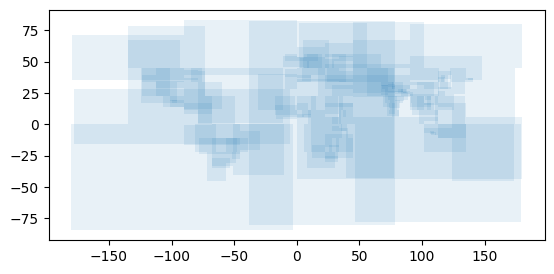

In [121]:
manifest[manifest.ovt_type=='building'].plot(alpha=0.1)